<a href="https://colab.research.google.com/github/hansaniii/ML_Assignment/blob/main/ML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# 1. **Data Exploration**:

In [13]:
# Load necessary libraries
import pandas as pd

In [14]:
# Load the dataset
df = pd.read_csv('/healthcare-dataset-stroke-data.csv')

In [15]:
# Inspect the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [16]:
# Summary of dataset
print("\nDataset Info:")
df_info = df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [17]:
# Summary statistics for numerical columns
print("\nDataset Description:")
df_description = df.describe()


Dataset Description:


In [18]:
# Check for missing values
print("\nMissing Values per Column:")
missing_values_count = df.isnull().sum()
print(missing_values_count)


Missing Values per Column:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [19]:
# Check if the dataset contains any missing values
has_missing_values = df.isnull().values.any()
print("\nDoes the dataset contain missing values?", has_missing_values)


Does the dataset contain missing values? True


In [ ]:
# 2. Exploratory Data Analysis (EDA)

In [20]:
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Age Distribution')

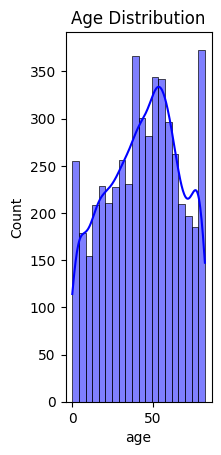

In [22]:
# Age distribution
plt.subplot(1, 3, 1)
sns.histplot(df['age'], kde=True, color='blue')
plt.title('Age Distribution')

Text(0.5, 1.0, 'Avg Glucose Level Distribution')

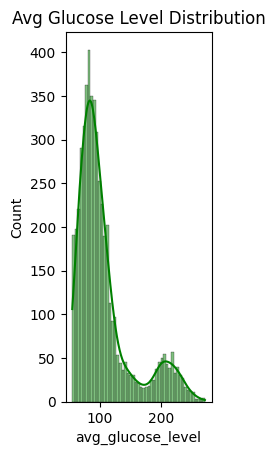

In [23]:
# Average Glucose Level distribution
plt.subplot(1, 3, 2)
sns.histplot(df['avg_glucose_level'], kde=True, color='green')
plt.title('Avg Glucose Level Distribution')

Text(0.5, 1.0, 'BMI Distribution')

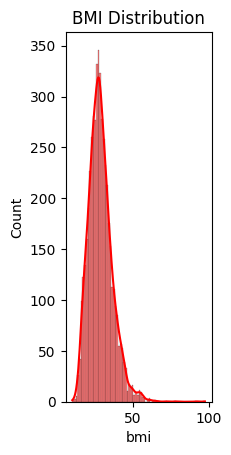

In [24]:
# BMI distribution
plt.subplot(1, 3, 3)
sns.histplot(df['bmi'], kde=True, color='red')
plt.title('BMI Distribution')

In [25]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

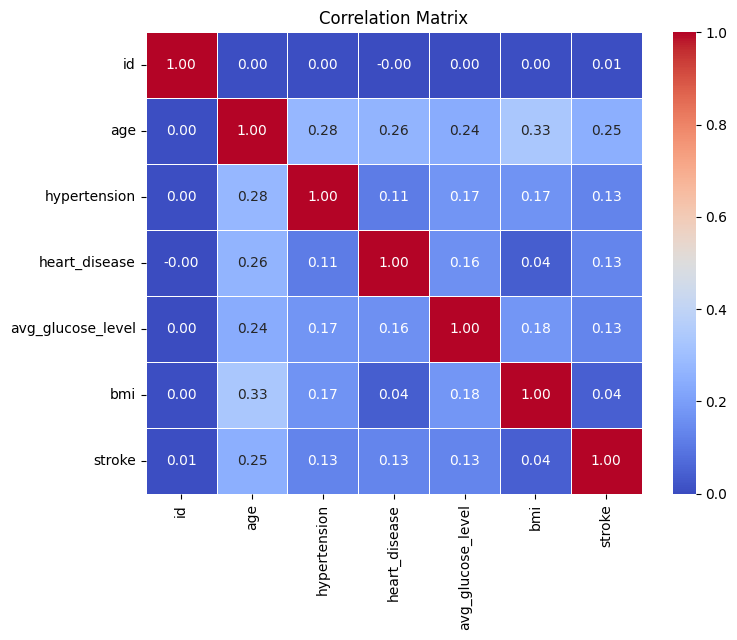

In [27]:
# Correlation heatmap
corr = df.select_dtypes(include=['number']).corr() # Select only numerical columns for correlation calculation
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Text(0.5, 1.0, 'Gender vs Stroke')

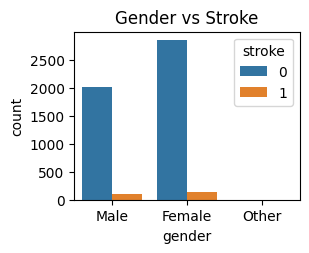

In [29]:
# Gender vs Stroke
plt.subplot(2, 2, 1)
sns.countplot(x='gender', hue='stroke', data=df)
plt.title('Gender vs Stroke')

Text(0.5, 1.0, 'Work Type vs Stroke')

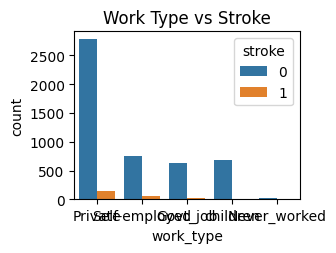

In [30]:
# Work Type vs Stroke
plt.subplot(2, 2, 2)
sns.countplot(x='work_type', hue='stroke', data=df)
plt.title('Work Type vs Stroke')

Text(0.5, 1.0, 'Smoking Status vs Stroke')

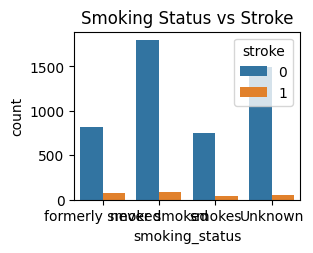

In [31]:
# Smoking Status vs Stroke
plt.subplot(2, 2, 3)
sns.countplot(x='smoking_status', hue='stroke', data=df)
plt.title('Smoking Status vs Stroke')

Text(0.5, 1.0, 'Residence Type vs Stroke')

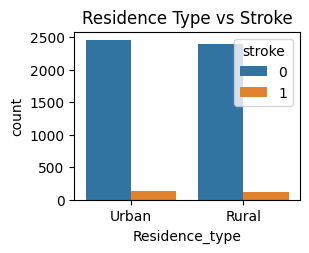

In [32]:
# Residence Type vs Stroke
plt.subplot(2, 2, 4)
sns.countplot(x='Residence_type', hue='stroke', data=df)
plt.title('Residence Type vs Stroke')

In [ ]:
# 3.Data Preprocessing:

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [35]:
# Handle missing values: Impute missing values in 'bmi' with the median
df['bmi'].fillna(df['bmi'].median(), inplace=True)

<ipython-input-35-eabcad1837a9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


In [36]:
# One-Hot Encoding for categorical features
df_encoded = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type',
                                         'Residence_type', 'smoking_status'], drop_first=True)


In [37]:
# Feature scaling for numerical features
scaler = StandardScaler()
df_encoded[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df_encoded[['age', 'avg_glucose_level', 'bmi']])

In [38]:
# Split data into features (X) and target (y)
X = df_encoded.drop('stroke', axis=1)
y = df_encoded['stroke']


In [39]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 4.Model Fitting & Evaluation

In [40]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [41]:
# Initialize the models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Linear Regression': LinearRegression(),  # For comparison, but not ideal for classification
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

In [43]:
# Train and evaluate each model
results = {}
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    # Apply this condition to skip evaluating regression models with classification metrics
    if model_name != 'Linear Regression':
        # Convert predictions to binary for classification metrics
        y_pred_binary = (y_pred > 0.5).astype(int)  # Adjust threshold if necessary
        accuracy = accuracy_score(y_test, y_pred_binary)
        class_report = classification_report(y_test, y_pred_binary)
        conf_matrix = confusion_matrix(y_test, y_pred_binary)

        # Store the results
        results[model_name] = {
            'accuracy': accuracy,
            'classification_report': class_report,
            'confusion_matrix': conf_matrix
        }

        print(f"\n{model_name} Evaluation:")
        print(f"Accuracy: {accuracy}")
        print(f"Classification Report:\n{class_report}")
        print(f"Confusion Matrix:\n{conf_matrix}")
    # For Linear Regression, use appropriate evaluation metrics
    # (e.g., R-squared, Mean Squared Error)
    else:
        from sklearn.metrics import mean_squared_error, r2_score #Import necessary regression metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[model_name] = {
            'mean_squared_error': mse,
            'r2_score': r2
        }
        print(f"\n{model_name} Evaluation:")
        print(f"Mean Squared Error: {mse}")
        print(f"R-squared: {r2}")

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest Evaluation:
Accuracy: 0.9393346379647749
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Confusion Matrix:
[[960   0]
 [ 62   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/l


SVM Evaluation:
Accuracy: 0.9393346379647749
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Confusion Matrix:
[[960   0]
 [ 62   0]]

Logistic Regression Evaluation:
Accuracy: 0.9383561643835616
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Confusion Matrix:
[[959   1]
 [ 62   0]]

Linear Regression Evaluation:
Mean Squared Error: 0.051577281550655996
R-squared: 0.09489843173462043

K-Near